In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale= 1./255,horizontal_flip = True,vertical_flip = True,zoom_range = 0.2)
test_datagen = ImageDataGenerator(rescale= 1./255)

In [ ]:
x_train = train_datagen.flow_from_directory("/content/drive/MyDrive/ibm project/flowers",target_size = (64,64),
                                            class_mode = "categorical",batch_size = 24)

Found 4317 images belonging to 5 classes.


In [ ]:
x_test = test_datagen.flow_from_directory("/content/drive/MyDrive/ibm project/flowers",target_size = (64,64),
                                                                                      class_mode = "categorical",batch_size = 24)

Found 4317 images belonging to 5 classes.


In [ ]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten

In [ ]:
model=Sequential()

In [ ]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

In [12]:
model.add(Dense(5,activation='softmax'))
len(x_train)

180

In [13]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
model.fit(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)

Epoch 1/10
180/180 [==============================] - 681s 4s/step - loss: 1.3506 - accuracy: 0.3831 - val_loss: 1.1374 - val_accuracy: 0.5054
Epoch 2/10
180/180 [==============================] - 66s 368ms/step - loss: 1.1533 - accuracy: 0.5122 - val_loss: 1.0605 - val_accuracy: 0.5726
Epoch 3/10
180/180 [==============================] - 66s 368ms/step - loss: 1.0350 - accuracy: 0.5858 - val_loss: 1.0030 - val_accuracy: 0.6032
Epoch 4/10
180/180 [==============================] - 66s 368ms/step - loss: 0.9717 - accuracy: 0.6152 - val_loss: 0.9400 - val_accuracy: 0.6421
Epoch 5/10
180/180 [==============================] - 66s 366ms/step - loss: 0.9135 - accuracy: 0.6433 - val_loss: 0.9381 - val_accuracy: 0.6310
Epoch 6/10
180/180 [==============================] - 66s 368ms/step - loss: 0.8885 - accuracy: 0.6486 - val_loss: 0.8836 - val_accuracy: 0.6428
Epoch 7/10
180/180 [==============================] - 67s 372ms/step - loss: 0.8574 - accuracy: 0.6671 - val_loss: 0.9784 - val_accu

In [15]:
model.save('IBM_flowers.h5')

In [16]:
pwd

'/content'

In [17]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [18]:
model=load_model('IBM_flowers.h5')

In [19]:
img=image.load_img('/content/drive/MyDrive/ibm project/flowers/dandelion/1128626197_3f52424215_n.jpg')

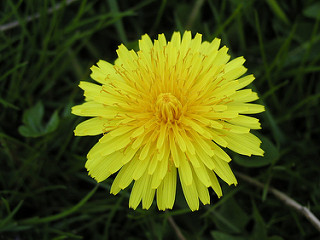

In [20]:
img

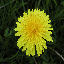

In [21]:
img=image.load_img('/content/drive/MyDrive/ibm project/flowers/dandelion/1128626197_3f52424215_n.jpg',target_size=(64,64))
img

In [22]:
x=image.img_to_array(img)
x


array([[[15., 21., 11.],
        [34., 50., 23.],
        [20., 33., 13.],
        ...,
        [19., 30., 13.],
        [16., 29.,  9.],
        [17., 25., 10.]],

       [[13., 20., 12.],
        [29., 47., 21.],
        [34., 59., 19.],
        ...,
        [20., 32.,  8.],
        [26., 43., 24.],
        [33., 53., 25.]],

       [[12., 17., 10.],
        [25., 43., 17.],
        [34., 56., 18.],
        ...,
        [35., 56., 25.],
        [39., 69., 35.],
        [39., 63., 29.]],

       ...,

       [[26., 39., 22.],
        [22., 29., 21.],
        [19., 31., 21.],
        ...,
        [16., 21., 14.],
        [ 7.,  9.,  4.],
        [15., 18.,  9.]],

       [[11., 13.,  8.],
        [ 5.,  7.,  2.],
        [12., 14.,  9.],
        ...,
        [12., 17., 11.],
        [ 8.,  9.,  4.],
        [ 2.,  2.,  0.]],

       [[15., 17., 12.],
        [17., 19., 14.],
        [14., 17., 10.],
        ...,
        [ 4.,  6.,  1.],
        [ 5.,  7.,  4.],
        [10., 12.,  7.]]

In [23]:
x=np.expand_dims(x,axis=0)
x

array([[[[15., 21., 11.],
         [34., 50., 23.],
         [20., 33., 13.],
         ...,
         [19., 30., 13.],
         [16., 29.,  9.],
         [17., 25., 10.]],

        [[13., 20., 12.],
         [29., 47., 21.],
         [34., 59., 19.],
         ...,
         [20., 32.,  8.],
         [26., 43., 24.],
         [33., 53., 25.]],

        [[12., 17., 10.],
         [25., 43., 17.],
         [34., 56., 18.],
         ...,
         [35., 56., 25.],
         [39., 69., 35.],
         [39., 63., 29.]],

        ...,

        [[26., 39., 22.],
         [22., 29., 21.],
         [19., 31., 21.],
         ...,
         [16., 21., 14.],
         [ 7.,  9.,  4.],
         [15., 18.,  9.]],

        [[11., 13.,  8.],
         [ 5.,  7.,  2.],
         [12., 14.,  9.],
         ...,
         [12., 17., 11.],
         [ 8.,  9.,  4.],
         [ 2.,  2.,  0.]],

        [[15., 17., 12.],
         [17., 19., 14.],
         [14., 17., 10.],
         ...,
         [ 4.,  6.,  1.],
        

In [26]:
y=np.argmax(model.predict(x),axis=1)
y

array([3])

In [27]:
x_train.class_indices


{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [28]:
index=['daisy','dandelion','rose','sunflower','tulip']

In [29]:
index[y[0]]

'sunflower'